# Assignment 1: Speech Production and Models 
#### EQ2321 Speech and Audio Signal Processing

Max. grade: 30

**Instructions for the deliverables**

Perform all (or as many as you can) of the tasks in this project assignment.
Summarize your results in a presentation style document. 
You are going to present your work to the course responsible or one of the teaching assistants (TA)
and it pays off to have a clear, well structured and brief document. Explicitly
state, on the slides, the problem numbers.
Include an algorithmic solution and/or numerical result and/or a graph illustrating your results.
Your Python code should be functioning and easy to read.

You have to send us you `Python` source code at least a day before the scheduled time for your
presentation. 
Use a naming convention for your files that is easy to understand and associate with a specific problem number. 
Be prepared to demo your own code on a personal or our computer.
Archive your files before sending them to us!

**Grading system**
Each correctly solved task brings you a certain amount of points.
The grade you get depends on the amount of points you accumulate and your ability to motivate your solutions during the presentation.
A passing grade corresponds to having 30\% and more of the total amount of points, while an excellent grade requires 85\% and more.
No points will be granted for a correct response if you cannot motivate your answer.

Keep in mind, when working in a group of two, that both people are expected to be able to make a complete presentation and answer questions related to all problems.
You may be graded differently depending on your responses.
The grade you get depends on the amount of correctly solved tasks and your ability to motivate the solutions during the presentation.

In our first experiment we study how low-pass filtering affects the speech signal. Load the files male44.wav and female44.wav. The speech is sampled at 44.1 kHz.

In [2]:
import pickle as pkl

male_fname="male44.wav"
female_fname="female44.wav"
assignment_file="assignment1.pkl"

def read_assignment_file(fname):
    with open(fname,"rb") as f:
        d=pkl.load(f)
    return d


d=read_assignment_file(assignment_file)

from scipy.io import wavfile
import numpy as np

def read_wav(fname):
    raw_data=wavfile.read(fname)
    return raw_data[1].astype(np.float32), raw_data[0]


# https://python-sounddevice.readthedocs.io/en/0.3.6/
# !pip install sounddevice

import sounddevice as sd

def play_wav(x,fs):
    sd.play(x.astype(np.int16),fs)


from scipy.signal import firwin,filtfilt
def lowpass(x,fc,fs=44100):
    """ x is the signal, 
        fc is the cuttoff frequency expressed in Hz, must be between [0,fs/2]
    """
    b = firwin(1024, fc,fs=fs)
    y = filtfilt(b,1,x)
    return y

# Function to play WAV file with delay
import time
def play_wav_with_delay(x, fs):
    sd.play(x.astype(np.int16), fs)
    sd.wait()  
    time.sleep(len(x) / fs) 


# Read WAV files
male_signal, male_fs = read_wav(male_fname)
female_signal, female_fs = read_wav(female_fname)

# Play original signals
print("Playing original male signal...")
play_wav(male_signal, male_fs)

print("Playing original female signal...")
play_wav(female_signal, female_fs)

# # Choose a range of cut-off frequencies to test
# cut_off_frequencies = [500, 1000, 2000, 5000, 10000]

# for fc in cut_off_frequencies:
#     # Apply low-pass filter to male signal
#     male_filtered = lowpass(male_signal, fc, male_fs)
    
#     # Apply low-pass filter to female signal
#     female_filtered = lowpass(female_signal, fc, female_fs)
    
#     # Play the filtered signals
#     print(f"Playing filtered male signal (cut-off frequency: {fc} Hz)...")
#     play_wav(male_filtered, male_fs)
#     play_wav_with_delay(male_filtered, male_fs)

#     print(f"Playing filtered female signal (cut-off frequency: {fc} Hz)...")
#     play_wav(female_filtered, female_fs)
#     play_wav_with_delay(female_filtered, female_fs)


Playing original male signal...
Playing original female signal...


### Question 1 (0.5 pts)


This is a test of intelligibility, i.e., how well we can understand what is spoken.

At what cut-off frequency do you start hearing what is said?

When the cut-off frequency equals 10000Hz, both male and female voices are very clear. When the cut-off frequency is equal to 2000 Hz, female voices are more easily recognizable than male voices.

### Question 2 (0.5 pts)

At what cut-off frequency do you start to hear a degradation in overall speech quality?

Around 1000Hz.

In [12]:
xmale, fs = read_wav(male_fname)
xfemale, fs = read_wav(female_fname)

In [13]:
# Inteligibility
play_wav(lowpass(xmale,2000,fs=fs),fs)

In [14]:
play_wav(lowpass(xfemale,2000,fs=fs),fs)

In [15]:
# Degradation
play_wav(lowpass(xfemale,3000,fs=fs),fs)

In [16]:
play_wav(lowpass(xfemale,3500,fs=fs),fs)

### Question 3 (1 pts)

Why, do you think (you are allowed to speculate!), is a sampling frequency of 8 kHz used in plain old telephony services (POTS)? 

The frequency range of the human voice is usually between 100 Hz and 4 kHz. According to Nyquist's theorem, the sampling frequency must be at least twice the highest frequency in the signal to accurately represent the signal. Therefore, a sampling frequency of 8 kHz reproduces the human voice while minimizing bandwidth requirements.

## Voiced and Unvoiced Speech Sounds (8 pts)

From a time plot, find voiced and unvoiced regions. Study the harmonic structure and envelope of the speech spectra corresponding to voiced and
unvoiced regions.

In [3]:
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

### Question 1 (2 pts)

Create a time plot with voiced and unvoiced regions marked.

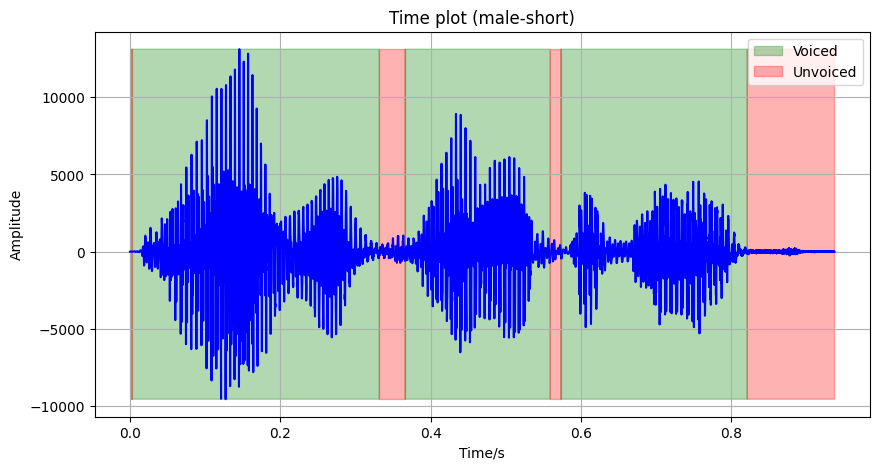

In [4]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

x = d["male_short"].reshape(-1)

# Function to detect voiced regions
def detect_voiced_regions(signal, threshold_energy):
    # Calculate energy of the signal
    energy = np.sum(np.square(signal))  # Remove axis parameter
    
    # Find peaks in the energy signal
    peaks, _ = find_peaks(signal, height=threshold_energy)
    
    # Initialize an array to store voiced regions
    voiced_regions = np.zeros_like(signal, dtype=bool)
    
    # Mark voiced regions around the peaks
    for peak in peaks:
        # Define a window around the peak
        start = max(0, peak - 200)
        end = min(len(signal), peak + 200)
        voiced_regions[start:end] = True
        
    return voiced_regions

# Function to plot voiced and unvoiced regions
def plot_voiced_unvoiced(signal, voiced_regions):
    time = np.arange(len(signal)) / 8000
    plt.figure(figsize=(10,5))
    plt.plot(time, signal, color='blue')
    plt.fill_between(np.arange(len(signal))/8000, signal.min(), signal.max(), where=voiced_regions, color='green', alpha=0.3, label='Voiced')
    plt.fill_between(np.arange(len(signal))/8000, signal.min(), signal.max(), where=~voiced_regions, color='red', alpha=0.3, label='Unvoiced')
    plt.xlabel('Time/s')
    plt.ylabel('Amplitude')
    plt.title('Time plot (male-short)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set a threshold energy level for detecting voiced regions
threshold_energy = 1500  # Adjust this threshold based on your signal

# Detect voiced regions in the male signal
voiced_regions_male = detect_voiced_regions(x, threshold_energy)

# Plot voiced and unvoiced regions
plot_voiced_unvoiced(x, voiced_regions_male)



### Question 2 (0.5 pts)

In the time plot, mark the regions where the pitch is the highest and the lowest. What are the approximate range of pitch frequencies in those regions?

<img src="./2024-02-09 173401.jpg" alt="alt text" width="800"/>

The approximate range of pitch frequencies in those regions is 170Hz.

### Question 3 (0.5 pts)

Plot the DFT based spectrum for a voiced frame using, the following snippet:

Text(2500, 40, '0.096 - 0.128 s')

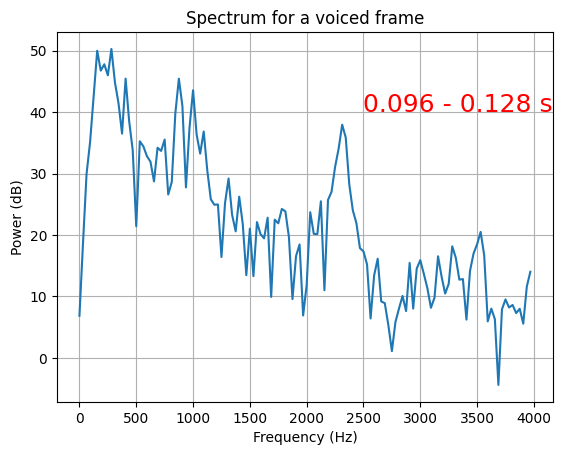

In [5]:
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

S = 768#... # Start of the frame
N = 256#... # Length of the frame

x = d["male_long"].reshape(-1)
xf = x[S:S+N]*signal.windows.hann(N)
X = fft(xf)

sampling_freq = 8000  # Assuming a sampling frequency of 44100 Hz
freqs = fftfreq(N, d=1/sampling_freq)

plt.figure()
plt.plot(freqs[:N//2], 10*np.log10(np.abs(X[1:N//2+1])**2))
plt.title("Spectrum for a voiced frame")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.grid(True)
plt.text(2500, 40, '0.096 - 0.128 s', color='red', fontsize=18)


### Question 4 (1 pts)

What is the mathematical expression of element `X[3]`, i.e.,
the third element in the FFT vector? What analog frequency (between
0-8000 Hz) does `X[3]` correspond to?


$X[3] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi \frac{3n}{N}}$\
\
$f_{analog}=\frac{2\cdot fs}{N}=66.7Hz$

### Question 5 (0.5 pts)

What is the fundamental frequency (pitch) in your particular case?

In [6]:
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

S = 768#... # Start of the frame
N = 256#... # Length of the frame

x = d["male_long"].reshape(-1)
xf = x[S:S+N]*signal.windows.hann(N)
X = fft(xf)

sampling_freq = 8000  # Assuming a sampling frequency of 44100 Hz
freqs = fftfreq(N, d=1/sampling_freq)

peaks, _ = find_peaks(np.abs(X[1:N//2+1]), height=0)

# 选择第一个峰值
first_peak_index = peaks[0]

# 使用峰值索引找到对应的频率
first_peak_frequency = freqs[first_peak_index]

print("The fundamental frequency (pitch):", first_peak_frequency, "Hz")

The fundamental frequency (pitch): 156.25 Hz


### Question 6 (1 pts)

What frame length is appropriate? What compromise do you have to
make when choosing frame length?

In speech signal processing, the typical frame length usually falls between 20 milliseconds to 30 milliseconds. This range is considered a balance, allowing for capturing short-term variations in the signal while also providing sufficient frequency resolution for spectrum analysis.\
When choosing the frame length, it's important to balance two aspects:\
Time resolution: Shorter frame lengths offer better time resolution, allowing for more precise capture of short-term signal variations.\
Frequency resolution: Longer frame lengths provide better frequency resolution, enabling more accurate analysis of the signal spectrum.






### Question 7 (1 pts)

Replace the hanning window function with a rectangular window and compare the result.

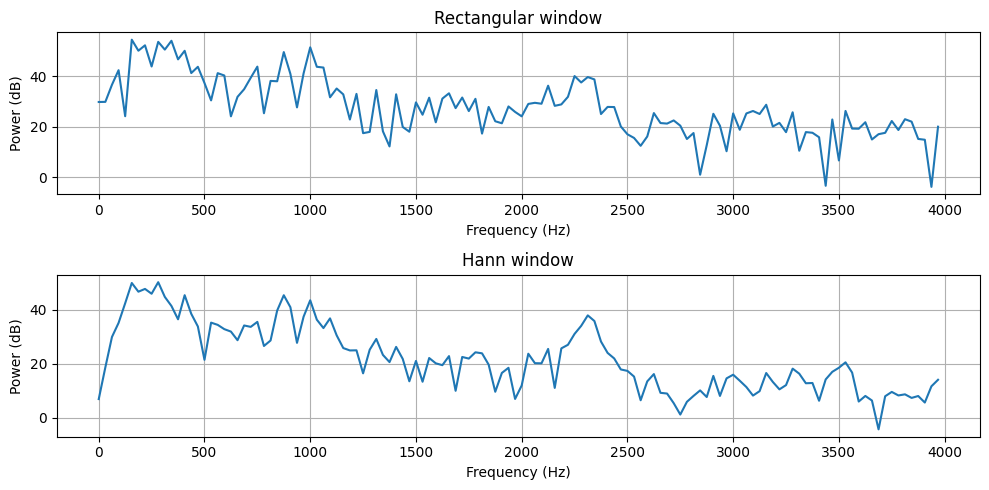

In [7]:
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

S = 768#... # Start of the frame
N = 256#... # Length of the frame

x = d["male_long"].reshape(-1)
rectangular_window = np.ones(N)
xf = x[S:S+N] * rectangular_window
xf2 = x[S:S+N]*signal.windows.hann(N)
X = fft(xf)
X2=fft(xf2)
sampling_freq = 8000  # Assuming a sampling frequency of 44100 Hz
freqs = fftfreq(N, d=1/sampling_freq)

plt.figure(figsize=(10, 5))  # 设置图的大小
plt.subplot(2, 1, 1)  # 创建第一个子图，2行1列的布局，第1个子图
plt.plot(freqs[:N//2],10*np.log10(np.abs(X[1:N//2+1])**2))
plt.title('Rectangular window')  # 设置标题
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.grid(True)
# 创建第二个图
plt.subplot(2, 1, 2)  # 创建第二个子图，2行1列的布局，第2个子图
plt.plot(freqs[:N//2],10*np.log10(np.abs(X2[1:N//2+1])**2))
plt.title('Hann window')  # 设置标题
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.grid(True)
plt.tight_layout()  # 调整子图的间距
plt.show()

The spectrum plot of a Hamming window appears smoother compared to that of a rectangular window. This is because the Hamming window has a narrower main lobe and smaller side lobes in the frequency domain, resulting in less spectral leakage compared to the rectangular window.\
Conversely, the spectrum plot of a rectangular window typically exhibits more side lobes due to its wider main lobe, which may result in irregular fluctuations in the spectrum plot.

### Question 8 (0.5 pts)

Extend the code above with the following lines to plot also the LP envelope of the short-time speech spectrum:

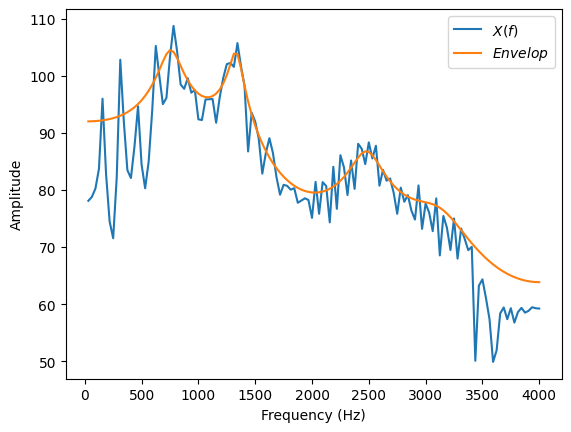

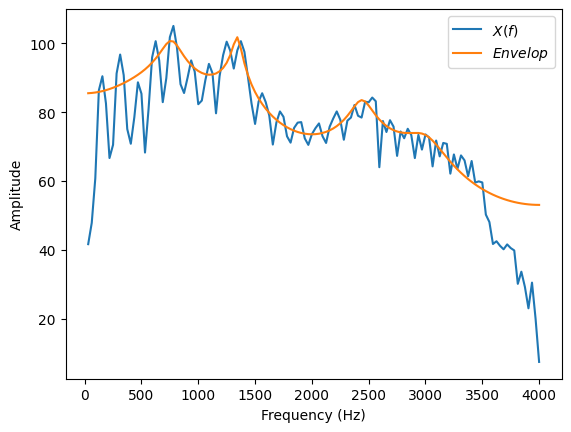

In [8]:
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

from scipy.linalg import solve_toeplitz, toeplitz
def xcorr(x,y,M=10):
    """
    Perform Cross-Correlation on x and y
    x    : 1st signal
    y    : 2nd signal

    returns
    lags : lags of correlation
    corr : coefficients of correlation
    """
    corr = signal.correlate(x, y, mode="full")
    lags = signal.correlation_lags(len(x), len(y), mode="full")
    idx=(lags>=-M) & (lags<=M)
    corr = corr[idx]
    lags=lags[idx]
    return lags[len(lags)//2:], corr[len(lags)//2:]

def get_envelop(xf,M,N=1024,fs=44100):

    lags, r = xcorr(xf, xf,M=M)

    a=np.concatenate([np.ones(1), solve_toeplitz(r[:-1], -r[1:])]).reshape(-1,1)
    e=(a.T @ r)[0]
    w, h2=signal.freqz(1,a,N,whole=True,fs=fs)
    
    X = fft(xf)
    fig,ax=plt.subplots(1,1)
    
    ax.plot(w[1:N//2+1],10*np.log10(np.abs(X[1:N//2+1])**2),label="$X(f)$")
    ax.plot(w[1:N//2+1],10*np.log10(e*np.abs(h2[1:N//2+1])**2),label="$Envelop$")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Amplitude")
    ax.legend()
    return fig,ax


# M is the prediction order
M = 10

S = 768#... # Start of the frame
N = 256#... # Length of the frame
fs=8000;

x = d["male_short"].reshape(-1)
rectangular_window = np.ones(N)
xf1 = x[S:S+N]*rectangular_window
xf2 = x[S:S+N]*signal.windows.hann(N)

fig,ax=get_envelop(xf1,M,N=N,fs=fs)
fig,ax=get_envelop(xf2,M,N=N,fs=fs)

### Question 9 (1 pts)

What is the mathematical expression of element `c(3)` (`corr(3)` in the `xcorr` function)? Why do we multiply `abs(h[1:N//2+1])**2` by `e` before plotting?

$c[3] = \frac{1}{N}\sum_{n=0}^{N-1} x[n+3]x[n]$\
\
Here "e" is the energy of the signal. Multiplying the squared magnitude of the frequency response by e scales the envelope to match the energy level of the original signal, thus ensuring that the plotted envelope is representative of the energy in the frequency domain.

### Question 10 (1 pts)

What prediction order do you recommend? 

We recommand M=10.

### Question 11 (0.5 pts)

Repeat the spectrum plotting for an unvoiced frame.

Text(1000, 75, '0.864 - 0.896 s')

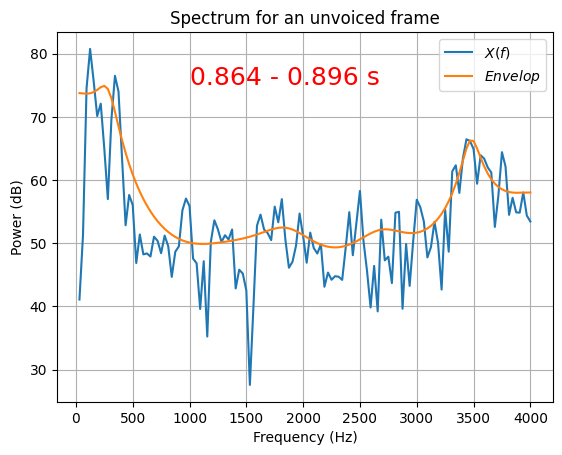

In [9]:
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

from scipy.linalg import solve_toeplitz, toeplitz
def xcorr(x,y,M=10):
    """
    Perform Cross-Correlation on x and y
    x    : 1st signal
    y    : 2nd signal

    returns
    lags : lags of correlation
    corr : coefficients of correlation
    """
    corr = signal.correlate(x, y, mode="full")
    lags = signal.correlation_lags(len(x), len(y), mode="full")
    idx=(lags>=-M) & (lags<=M)
    corr = corr[idx]
    lags=lags[idx]
    return lags[len(lags)//2:], corr[len(lags)//2:]

def get_envelop(xf,M,N=1024,fs=44100):

    lags, r = xcorr(xf, xf,M=M)

    a=np.concatenate([np.ones(1), solve_toeplitz(r[:-1], -r[1:])]).reshape(-1,1)
    e=(a.T @ r)[0]
    w, h2=signal.freqz(1,a,N,whole=True,fs=fs)
    
    X = fft(xf)
    fig,ax=plt.subplots(1,1)
    
    ax.plot(w[1:N//2+1],10*np.log10(np.abs(X[1:N//2+1])**2),label="$X(f)$")
    ax.plot(w[1:N//2+1],10*np.log10(e*np.abs(h2[1:N//2+1])**2),label="$Envelop$")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Amplitude")
    ax.legend()
    return fig,ax


# M is the prediction order
M = 12

S = 6400#... # Start of the frame 第27个frame，0.864s
N = 256#... # Length of the frame
fs=8000;

x = d["male_short"].reshape(-1)
xf2 = x[S:S+N]*signal.windows.hann(N)

fig,ax=get_envelop(xf2,M,N=N,fs=fs)
plt.title("Spectrum for an unvoiced frame")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.grid(True)
plt.text(1000, 75, '0.864 - 0.896 s', color='red', fontsize=18)

## Formants (2.5 pts)

In the speech variable “male short”, try to identify the vowels by comparing
the formants from an LP analysis to the formant frequencies of template vowels
in Table 1. Note that the table contains only the three first formants; you can
often see up to four formants.


|vowel|F1|F2|F3|example|
|:---:|:--:|:--:|:--:|:---:|
|iy|270|2290|3010|beet|
|ih|390|1990|2550|bit|
|eh|530|1840|2480|bet|
|ae|660|1720|2410|bat|
|ah|520|1190|2390|but|
|aa|730|1090|2240|hot|
|ao|570|840|2410|bought|
|uh|440|1020|2240|foot|
|uw|300|870|2240|boot|
|er|490|1350|1690|bird|

### Question 1 (1 pts)

In the time plot from the previous section, add the formant frequencies
and the vowels you come up with.

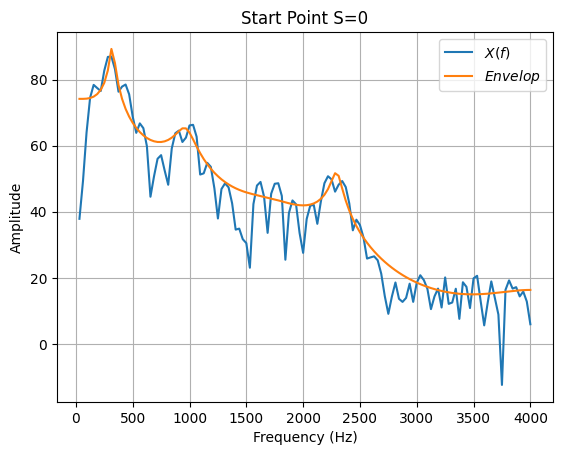

In [10]:
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

# M is the prediction order
M = 10

S_values = [0]#... # Start of the frame
N = 256#... # Length of the frame
fs=8000;

x = d["male_short"].reshape(-1)

for S in S_values:
    xf2 = x[S:S+N]*signal.windows.hann(N)
    fig, ax = get_envelop(xf2, M, N=N, fs=fs)
    plt.grid(True)
    plt.title(f"Start Point S={S}")  # 添加标题，以便区分不同的起始点
    plt.show()

According to Table 1, we find that in the first frame, the vowel is uw.\
\
We then change the Start of the frame. Finally we can find that:

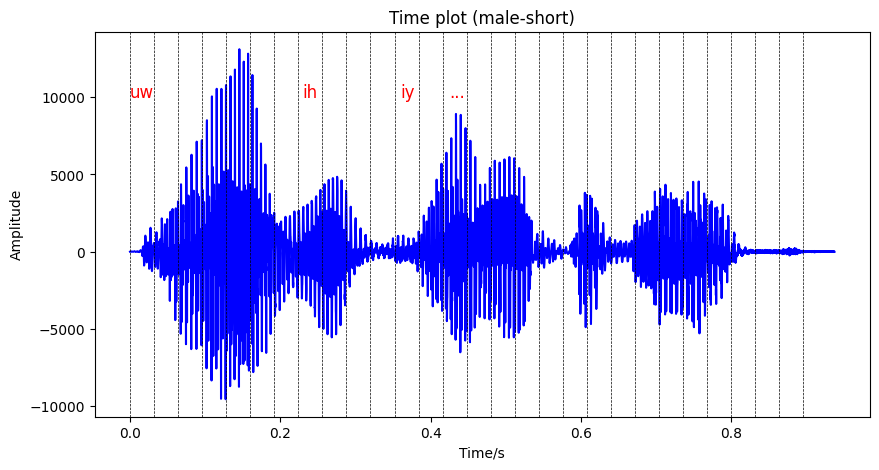

In [11]:
# Function to split signal into frames
def split_into_frames(signal, frame_length, hop_length):
    num_frames = (len(signal) - frame_length) // hop_length + 1
    frames = np.zeros((num_frames, frame_length))
    for i in range(num_frames):
        start = i * hop_length
        frames[i] = signal[start:start+frame_length]
    return frames

# Set frame length and hop length
frame_length = 256
hop_length = 256  # Adjust hop length based on your requirement

# Split signal into frames
frames = split_into_frames(x, frame_length, hop_length)

# Plot voiced and unvoiced regions with vertical lines representing frame boundaries
def plot_voiced_unvoiced_with_frames(signal, voiced_regions, frame_length, hop_length):
    time = np.arange(len(signal)) / 8000
    plt.figure(figsize=(10,5))
    plt.plot(time, signal, color='blue')
    plt.xlabel('Time/s')
    plt.ylabel('Amplitude')
    plt.title('Time plot (male-short)')
    
    # Add vertical lines for frame boundaries
    for i in range(len(signal)//hop_length):
        plt.axvline(x=i*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    
    plt.text(0, 10000, 'uw', color='red', fontsize=12)
    plt.text(0.23, 10000, 'ih', color='red', fontsize=12)
    plt.text(0.36, 10000, 'iy', color='red', fontsize=12)
    plt.text(0.425, 10000, '...', color='red', fontsize=12)
    plt.show()

# Plot voiced and unvoiced regions with frame boundaries
plot_voiced_unvoiced_with_frames(x, voiced_regions_male, frame_length, hop_length)


### Question 2 (1.5 pts)

How are pitch and formant frequencies related?

Each vowel has a corresponding formant frequency, and this frequency does not change with pitch.

The relationship between pitch and formant frequencies lies in their interaction during speech production:

Voicing: Voiced speech sounds are produced when the vocal cords vibrate, generating a fundamental frequency (F0). This F0 contributes to the perceived pitch of the speech.

Resonance: As the voiced sound passes through the vocal tract, it interacts with the resonant frequencies (formants) of the vocal tract. These formants shape the spectral characteristics of the sound, influencing its timbre and perceived quality.

Harmonic Structure: The harmonics of the fundamental frequency (F0) align with the resonant frequencies (formants) of the vocal tract. This alignment contributes to the clarity and richness of speech sounds. Formant frequencies help in distinguishing different vowels and consonants, as they provide cues for phonetic distinctions.

In summary, while pitch relates to the perceived frequency of a sound and is primarily determined by the fundamental frequency (F0), formant frequencies arise from the resonance properties of the vocal tract and play a crucial role in shaping the spectral characteristics and perceived quality of speech sounds. The interaction between pitch and formant frequencies contributes to the richness and intelligibility of human speech.

## Phonemes and Allophones (2.5 pts)

Vowels, which we studied in the previous section, constitute one class of phonemes.
Here we identify what other phonemes are contained in “male short”.

### Question 1 (1 pts)

In the time plot from the previous sections, mark the regions of the other phonemes and label each region with the correct phonetic symbol.

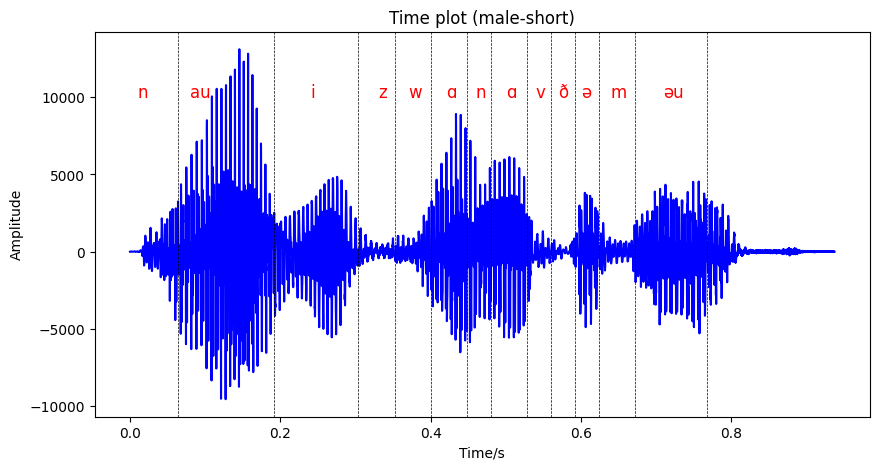

In [13]:
# Function to split signal into frames
def split_into_frames(signal, frame_length, hop_length):
    num_frames = (len(signal) - frame_length) // hop_length + 1
    frames = np.zeros((num_frames, frame_length))
    for i in range(num_frames):
        start = i * hop_length
        frames[i] = signal[start:start+frame_length]
    return frames

# Set frame length and hop length
frame_length = 256
hop_length = 256  # Adjust hop length based on your requirement

# Split signal into frames
frames = split_into_frames(x, frame_length, hop_length)

# Plot voiced and unvoiced regions with vertical lines representing frame boundaries
def plot_voiced_unvoiced_with_frames(signal, voiced_regions, frame_length, hop_length):
    time = np.arange(len(signal)) / 8000
    plt.figure(figsize=(10,5))
    plt.plot(time, signal, color='blue')
    plt.xlabel('Time/s')
    plt.ylabel('Amplitude')
    plt.title('Time plot (male-short)')
    
    # Add vertical lines for frame boundaries
    plt.axvline(x=2*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=6*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=9.5*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=11*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=12.5*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=14*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=15*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=16.5*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=17.5*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=18.5*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=19.5*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=21*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(x=24*hop_length/8000, color='black', linestyle='--', linewidth=0.5)
    
    plt.text(0.01, 10000, 'n', color='red', fontsize=12)
    plt.text(0.08, 10000, 'au', color='red', fontsize=12)
    plt.text(0.24, 10000, 'i', color='red', fontsize=12)
    plt.text(0.33, 10000, 'z', color='red', fontsize=12)
    plt.text(0.37, 10000, 'w', color='red', fontsize=12)
    plt.text(0.42, 10000, '\u0251', color='red', fontsize=12)
    plt.text(0.46, 10000, 'n', color='red', fontsize=12)
    plt.text(0.5, 10000, '\u0251', color='red', fontsize=12)
    plt.text(0.54, 10000, 'v', color='red', fontsize=12)
    plt.text(0.57, 10000, '\u00F0', color='red', fontsize=12)
    plt.text(0.6, 10000, '\u0259', color='red', fontsize=12)
    plt.text(0.64, 10000, 'm', color='red', fontsize=12)
    plt.text(0.71, 10000, '\u0259u', color='red', fontsize=12)
    plt.show()

# Plot voiced and unvoiced regions with frame boundaries
plot_voiced_unvoiced_with_frames(x, voiced_regions_male, frame_length, hop_length)

### Question 2 (1 pts)

Can consonants have formant frequencies?

Yes, consonants can have formant frequencies, although they are typically less prominent compared to vowels.

### Question 3 (0.5 pts)

What is a diphthong?

Diphthongs involve a gliding transition of the articulators from one vowel to another vowel.They are often considered to be single phonemes or speech sounds in many languages. In English, common diphthongs include the vowel combinations found in words like "price" /aɪ/, "mouth" /aʊ/, "boy" /ɔɪ/, "pain" /eɪ/, and "beer" /ɪə/.

### Question 4 (0.5 pts)

How many phonemes are there in English?

American English, for instance, consists of about 42 phonemes.

### Question 5 (0.5 pts)

What is a phone? What is an allophone? How many allophones are there?

A phoneme is defined as the smallest unit which differentiates between two words in one language. The acoustic representation associated with a phoneme is called a phone. 

An allophone is one of the different alternative sound (phones) or variants that can be used to pronounce the same phoneme.

There's a different number of allophones for each different phoneme.

## The Spectrogram (3 pts)

Program a spectrogram function in Python. A spectrogram shows the energy in speech as a function of time and frequency. The result is often displayed with time on the horizontal axis, and frequency on the vertical
axis. The energy (squared magnitude, and in dB) of the DFT coefficients are illustrated by e.g. a grayscale, where black corresponds to high energy, and white represents low energy. To obtain a smooth evolution over time,
we want to use overlapping analysis windows, see Figure 1. 
Test your function on the speech samples provided for this lab. For the presentation have the result for “male short” available.
<img src="./windowing.png" alt="alt text" width="400"/>

### Question 1 (0.5 pts)

First program a function that extracts overlapping frames and plots each frame. 
Input arguments should be update length, and analysis length.

Call `myspectrogram(x_short, 256, 32)` and view the animation. 

In [14]:
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

%matplotlib auto
def myspectrogram(x, alen, ulen):
    """ x is the speech vector, 
    alen is the analysis frame length, 
    ulen is the update length"""
    N = len(x)
    naf = (N-alen+ulen)//ulen
    n1 = 0
    plt.figure()
    for n in range(0,naf):
        xf = x[n1:n1+alen]
        plt.cla()
        plt.plot(xf)
        plt.xlim([1,alen])
        plt.ylim([min(x),max(x)])
        plt.pause(0.05)
        n1 = n1 + ulen
myspectrogram(d["male_short"], 256, 32)

Using matplotlib backend: <object object at 0x000002640B307FF0>


### Question 2 (0.5 pts)

Next add frequency analysis of each frame. Use the code for the DFT based spectrum from section 3 (dont forget to window before DFT). If you want to plot both the time domain signal, and the spectrum in the same plot, but in different parts of the window, see subplot. Illustrate the function as in the previous step.

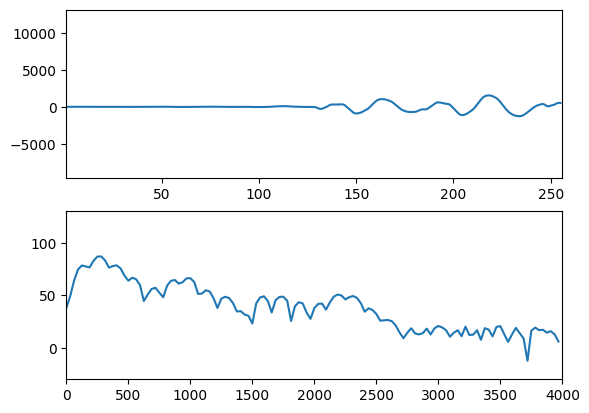

In [12]:
import pickle as pkl
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
# assignment_file="assignment1.pkl"
# def read_assignment_file(fname):
#     with open(fname,"rb") as f:
#         d=pkl.load(f)
#     return d
# d=read_assignment_file(assignment_file)

def myspectrogram(x, alen, ulen, axs):
    """ x is the speech vector, 
    alen is the analysis frame length, 
    ulen is the update length"""
    sample_rate = 8000;
    N = len(x)
    naf = (N-alen+ulen)//ulen
    n1 = 0
    for n in range(0,naf):
        xf = x[n1:n1+alen]
        axs[0].cla()
        axs[0].plot(xf)
        axs[0].set_xlim([1,alen])
        axs[0].set_ylim([min(x),max(x)])     
        
        x2 = x.reshape(-1)
        xf2 = (x2[n1:n1+alen])*signal.windows.hann(alen)
        X = fft(xf2)
        X_y = 10*np.log10(np.abs(X[1:alen//2+1])**2)
        frequencies = np.fft.fftfreq(alen, 1/sample_rate)
        axs[1].cla()
        axs[1].plot(frequencies[0:alen//2],X_y)
        axs[1].set_xlim([0,4000])
        axs[1].set_ylim([-30,130])
        
        plt.pause(0.05)
        n1 = n1 + ulen

        
fig,axs = plt.subplots(2,1)
myspectrogram(d["male_short"], 256, 32, axs)

### Question 3 (1 pts)

Now we are ready to implement the classical spectrogram. Instead of plotting the squared magnitude of the DFT, you put it into the columns of a matrix S. Preallocate the matrix with 
```python
S = np.zeros((alen//2+1, naf))
```
In the loop you write to column n by 

```python
S[:,n] = ...
```
In this assignment it is important that the right hand side is a column vector. To plot the spectrogram, use the following code:
```python

# type help gray for other colormaps
plt.imshow(np.flipud(-S), aspect="equal",cmap="gray"); # flipud flips S along the frequency axis so that
# frequencies increase when we move up the vertical axis
# -S makes black correspond to high energy!
```


Text(0.5, 1.0, 'Spectrogram of male_short')

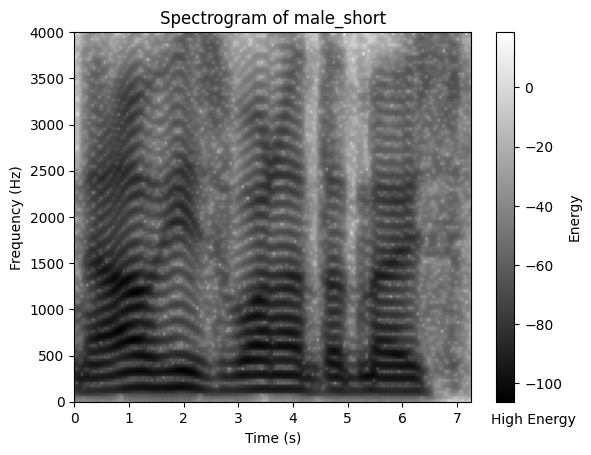

In [13]:
import pickle as pkl
import numpy as np

def myspectrogram(x, alen, ulen):
    """ x is the speech vector, 
    alen is the analysis frame length, 
    ulen is the update length"""
    N = len(x)
    naf = (N-alen+ulen)//ulen
    n1 = 0
    sample_rate = 8000;
    S = np.zeros((alen//2, naf))
    for n in range(0,naf):          
        x2 = x.reshape(-1)
        xf2 = (x2[n1:n1+alen])*signal.windows.hann(alen)
        X = fft(xf2)
        S[:,n] = 10*np.log10(np.abs(X[1:alen//2+1])**2)
        n1 = n1 + ulen
        
    plt.figure()
    plt.imshow(np.flipud(-S), aspect="auto",cmap="gray",extent=[0, (alen/sample_rate)*naf,0,4000]); # flipud flips S along the frequency axis so that
                                                            # frequencies increase when we move up the vertical axis
                                                            # -S makes black correspond to high energy!   
    plt.colorbar(label='Energy')
    plt.text(1.05, -0.05, 'High Energy', transform=plt.gca().transAxes, va='center')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

        
myspectrogram(d["male_short"], 256, 32)
plt.title('Spectrogram of male_short')

### Question 4 (0.5 pts)

Produce a narrow-band spectrogram. Be prepared to indicate the fundamental frequency track, and the boundaries of the phonemes.

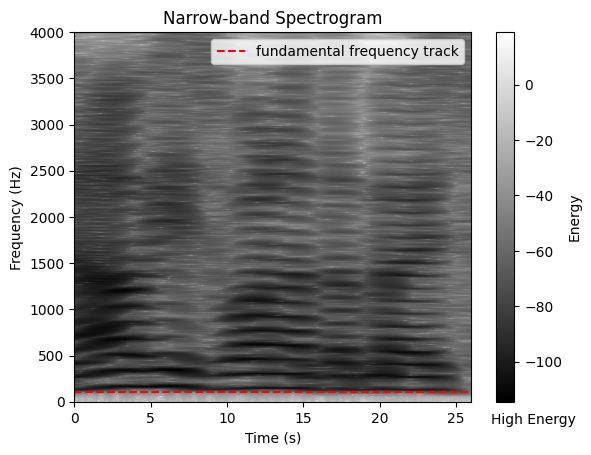

In [14]:
alen=1024
ulen=32
myspectrogram(d["male_short"], alen, ulen)
plt.title('Narrow-band Spectrogram')
plt.axhline(y=100, color='r', linestyle='--', label='fundamental frequency track')
plt.legend()

### Question 5 (0.5 pts)

Produce a wide-band spectrogram. Here the spectrogram tends to become blocky if smoothing is not performed in the frequency domain. Incorporate smoothing by zero-padding before applying the DFT. Can you see the
formant trajectories?

Text(0.5, 1.0, 'Wide-band Spectrogram with Zero-padding')

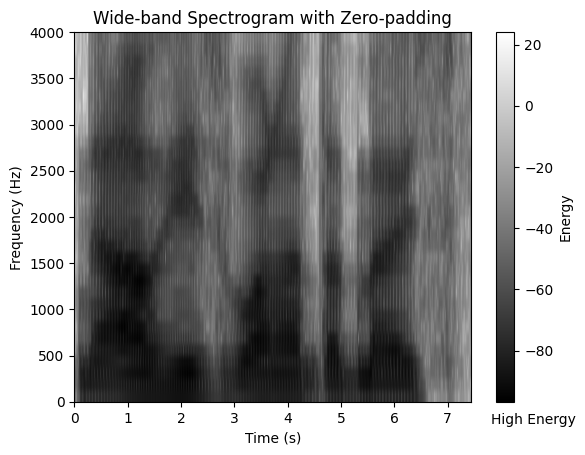

In [15]:
alen=64
ulen=8
# myspectrogram(d["male_short"], alen, ulen)
# plt.title('Wide-band Spectrogram')


def myspectrogram_zeropadding(x, alen, ulen):
    """ x is the speech vector, 
    alen is the analysis frame length, 
    ulen is the update length"""
    N = len(x)
    naf = (N-alen+ulen)//ulen
    n1 = 0
    sample_rate = 8000;
    S = np.zeros((alen//2, naf))
    for n in range(0,naf):          
        x2 = x.reshape(-1)
        xf2 = (x2[n1:n1+alen])*signal.windows.hann(alen)
        xf2 = np.pad(xf2,(0, 8), 'constant') # Zero-padding
        X = fft(xf2)
        S[:,n] = 10*np.log10(np.abs(X[1:alen//2+1])**2)
        n1 = n1 + ulen
        
    plt.figure()
    plt.imshow(np.flipud(-S), aspect="auto",cmap="gray",extent=[0, (alen/sample_rate)*naf,0,4000]); # flipud flips S along the frequency axis so that
                                                            # frequencies increase when we move up the vertical axis
                                                            # -S makes black correspond to high energy!   
    plt.colorbar(label='Energy')
    plt.text(1.05, -0.05, 'High Energy', transform=plt.gca().transAxes, va='center')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

myspectrogram_zeropadding(d["male_short"], alen, ulen)
plt.title('Wide-band Spectrogram with Zero-padding')

## Speech Parameter Estimation (5 pts)

In this section, you will analyze (estimate) the parameters of a vocoder model. In the next section you will synthesize speech based on the estimated parameters. The parameters we will estimate are frame energy, pitch, vocal tract filter coefficients, and voiced/unvoiced classification. The estimation should be done on a frame-by-frame basis and we will use overlapping analysis frames. Just as in the case of the spectrogram the choice of analysis frame length is a compromise between having long enough frames to get reliable estimates, but not too long so that rapid events are averaged out 2. Also as in the spectrogram case, the update length controls the smoothness of
the parameter trajectories over time.

### Question 1 (0.5 pts)

Let us warm up with estimation of frame energy (normalized per sample)
$E = \frac{1}{N_\alpha}\sum_{n=0}^{N_\alpha-1}x^2(n)$

where $N_\alpha$ is the analysis frame length and the sum is over the samples in one analysis frame. Write a function that returns the frame energies in a vector. Start with the function skeleton from the first task in section 6. Before the loop over all frames, allocate space for the vector of energies:

In [16]:
def analysis(x, alen, ulen):
    N = len(x)
    naf = (N-alen+ulen)//ulen
    # Initialization
    E = np.zeros((naf, 1))
    n1 = 0

    # Inside loop
    for n in range(0,naf):          
        sum_ = 0
        xf = x[n1:n1+alen]
        for n2 in range(len(xf)):
            sum_ += (xf[n2]**2) / len(xf)
        E[n] = sum_    
        n1 = n1 + ulen
    return E

### Question 2 (1 pts)

Next let us look at voiced/unvoiced detection. This is a difficult problem, but here we resolve to a simple solution based on zero-crossings. A zero
crossing occurs when $x(n)x(n − 1) < 0$. By counting all those occurrences within a frame, and normalizing by the frame length, a (near) continuous
parameter is obtained. To make a binary decision a threshold can be used (by normalizing with the frame length, the threshold becomes independent
(almost) of the analysis frame length). Extend your analysis function like:

In [17]:
def analysis(x, alen, ulen):
    N = len(x)
    naf = (N-alen+ulen)//ulen
    # Initialization
    E = np.zeros((naf, 1)) # frame energy
    ZC = np.zeros((naf, 1)) # The normalized number of zero crossings
    V = np.zeros((naf, 1)) # Equal to 1 if voiced, 0 if unvoiced.
    n1 = 0
    threshold = 0.3

    # Inside loop
    for n in range(0,naf):          
        xf = x[n1:n1+alen] # extract one frame
        n_zerocrossing = 0
        for n2 in range(len(xf)-1):
            if xf[n2] * xf[n2+1] < 0: 
                n_zerocrossing = n_zerocrossing + 1
                
        ZC[n] = n_zerocrossing / len(xf) # The normalized number of zero crossings
        if ZC[n] > threshold:
            V[n] = 1 # voiced
        else:
            V[n] = 0 # unvoiced
 
        n1 = n1 + ulen
    return E, ZC, V

x = d["male_long"].reshape(-1)
x = np.float64(x)
alen=256
ulen=32
E, ZC, V = analysis(x, alen, ulen)

### Question 3 (0.5 pts)

Next extend your analysis function by incorporating code for vocal tract
filter estimation via LP analysis. The code from Section 3 should work
fine! Store the filter parameters in the rows of a matrix like:

In [18]:
def analysis(x, alen, ulen, M):
    N = len(x)
    naf = (N-alen+ulen)//ulen
    n1 = 0
    n_zerocrossing = 0
    threshold = 0.3
    M = 10 # M is the prediction order.
    
    # Initialization
    E = np.zeros((naf, 1))
    ZC = np.zeros((naf, 1))
    V = np.zeros((naf, 1))
    A = np.zeros((naf, M+1)) # M+1 allows space for the leading 1

    
    # Inside loop
    for n in range(0,naf):          
        xf = x[n1:n1+alen] # extract one frame
        E[n] = (1/alen) * np.sum(np.square(xf))
        for n1 in range(n1,n1+alen-1):
            if xf[n1] * xf[n1+1] < 0:
                n_zerocrossing = n_zerocrossing + 1
                
        ZC[n] = n_zerocrossing / len(xf) # The normalized number of zero crossings
        if ZC[n] < threshold:
            V[n] = 1 # voiced
        else:
            V[n] = 0 # unvoiced
 
        lags, r = xcorr(xf, xf,M=M)
        A[n,:] = np.concatenate([np.ones(1), solve_toeplitz(r[:-1], -r[1:])]).reshape(-1,1) # Make sure the polynomial coefficients are in a row vector
        
        n1 = n1 + ulen   
    return E, ZC, V, A


from scipy.linalg import solve_toeplitz, toeplitz
def xcorr(x,y,M=10):
    """
    Perform Cross-Correlation on x and y
    x    : 1st signal
    y    : 2nd signal

    returns
    lags : lags of correlation
    corr : coefficients of correlation
    """
    corr = signal.correlate(x, y, mode="full")
    lags = signal.correlation_lags(len(x), len(y), mode="full")
    idx=(lags>=-M) & (lags<=M)
    corr = corr[idx]
    lags=lags[idx]
    return lags[len(lags)//2:], corr[len(lags)//2:]

### Question 4 (0.5 pts)

Finally extend the function with pitch analysis. Many speech coding (compression) systems depend on accurate pitch analysis. Here we base our estimation on the correlation function of the frame. You may choose if you
wish to use the ACF or the normalized cross-correlation function (slightly more difficult to program). The problem you have to solve is how to find the lag of the peak in the ACF that corresponds to one pitch period. This is usually easy to do “manually”, i.e., by looking at the ACF, but you have to make the computer do it automatically! The function will finally look something like

In [19]:
from scipy import signal
from scipy.linalg import solve_toeplitz, toeplitz
def xcorr_M(x,y,M=25):
#     """
#     Perform Cross-Correlation on x and y
#     x    : 1st signal
#     y    : 2nd signal

#     returns
#     lags : lags of correlation
#     corr : coefficients of correlation
#     """
    corr = signal.correlate(x, y, mode="full")
    lags = signal.correlation_lags(len(x), len(y), mode="full")
    idx=(lags>=-M) & (lags<=M)
    corr = corr[idx]
    lags=lags[idx]
    return lags[len(lags)//2:], corr[len(lags)//2:]


def analysis(x, alen, ulen, M):
    N = len(x)
    naf = (N-alen+ulen)//ulen
    n1 = 0
    n_zerocrossing = 0
    threshold = 0.3
    M = 10 # M is the prediction order.
    
    # Initialization
    E = np.zeros((naf, 1))
    ZC = np.zeros((naf, 1)) # The normalized number of zero crossings
    V = np.zeros((naf, 1))
    A = np.zeros((naf, M+1)) # M+1 allows space for the leading 1
    P = np.zeros((naf, 1)) # Pitch period in samples
    
    # Inside loop
    for n in range(0,naf):          
        xf = x[n1:n1+alen] # extract one frame
        sum_ = 0
        n_zerocrossing = 0
        
        for n2 in range(len(xf)-1):
            if xf[n2] * xf[n2+1] < 0: 
                n_zerocrossing = n_zerocrossing + 1
                
        ZC[n] = n_zerocrossing / len(xf) # The normalized number of zero crossings
        if ZC[n] < threshold:
            V[n] = 1 # voiced
        else:
            V[n] = 0 # unvoiced 
        
        for n2 in range(len(xf)):
            sum_ += (xf[n2]**2) / len(xf)
        E[n] = sum_  
        
            
        xf_window = xf*signal.windows.hann(alen)
        lags, r = xcorr_M(xf_window, xf_window,M=M)
        a = np.concatenate([np.ones(1), solve_toeplitz(r[:-1], -r[1:])]).reshape(-1,1) # Make sure the polynomial coefficients are in a row vector
        A[n,:] = a.T
        
        # pitch period
        corr = signal.correlate(xf, xf, mode="full")
        corr_positive = int(len(corr)/2)
        corr_half = corr[corr_positive:] # right half area of the acf
        acf_peaks, _ = signal.find_peaks(corr_half) # return index of the peaks
        index = np.argmax(corr_half[acf_peaks])
        P[n] = acf_peaks[index] # Pitch period in samples

        n1 = n1 + ulen   

    return E, ZC, V, A, P

### Question 5 (0.5 pts)

Plot the output of your analysis function with the following code (or include the code below in the analysis function).
Test and tune your analysis function on the files “male long”, and “female
long”. Be prepared to provide plots with smooth temporal evolution, i.e., with ulen = 1.

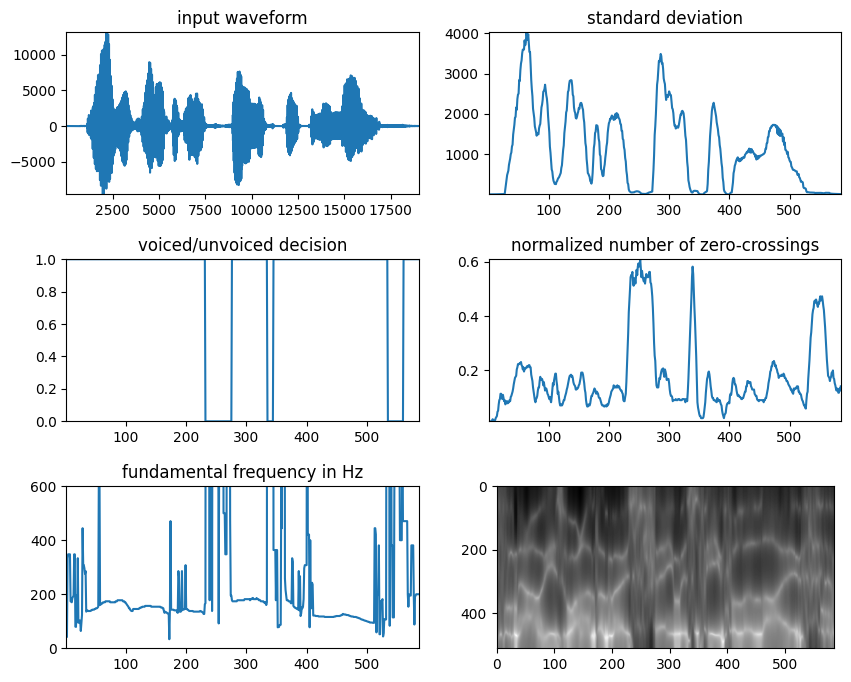

In [20]:
import pickle as pkl
from scipy.io import wavfile
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
assignment_file="assignment1.pkl"
def read_assignment_file(fname):
    with open(fname,"rb") as f:
        d=pkl.load(f)
    return d
d=read_assignment_file(assignment_file)

x = d["male_long"].reshape(-1)
x = np.float64(x)
alen=256
ulen=32
M=10
N = len(x)
naf = (N-alen+ulen)//ulen

E, ZC, V, A, P = analysis(x, alen, ulen, M)


plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.4)

plt.subplot(3,2,1)
plt.plot(x) # Plot the input waveform
plt.xlim([1, len(x)])
plt.ylim([np.min(x), np.max(x)])
plt.title('input waveform')

plt.subplot(3,2,2)
plt.plot(np.sqrt(E)) # Plot the standard deviation
plt.xlim([1,len(E)])
plt.ylim([np.min(np.sqrt(E)),np.max(np.sqrt(E))])
plt.title('standard deviation')

plt.subplot(3,2,3)
plt.plot(V) # Plot voiced/unvoiced decision
plt.xlim([1, len(V)])
plt.ylim([0,1]);
plt.title('voiced/unvoiced decision')

plt.subplot(3,2,4)
plt.plot(ZC) # Plot the normalized number of zero-crossings
plt.xlim([1,len(ZC)])
plt.ylim([np.min(ZC),np.max(ZC)])
plt.title('normalized number of zero-crossings')

plt.subplot(3,2,5)
F = 8000./P
plt.plot(F) # Plot the fundamental frequency in Hz
plt.xlim([1,len(F)])
plt.ylim([0,600])
plt.title('fundamental frequency in Hz')

plt.subplot(3,2,6)
S = np.zeros((512, naf))
for n in range(0,naf):
    S[:,n] = 20*np.log10(np.abs(signal.freqz(1,A[n,:],512)[1]))

S = np.flipud(S)
plt.imshow(S,cmap="gray",aspect = 0.55); # Illustrate the vocal tract envelope in a spectrogram style!

### Question 6 (1 pts)

What could make the voiced/unvoiced detection go wrong? 

- Threshold selection: The choice of threshold for distinguishing can influence the detection results. 

- Low SNR: When the SNR is low, the speech signal may be masked by noise, leading to detection errors.  

- Speech variability: Variations in speech characteristics such as pitch, intensity and duration can affect the accuracy of detection (different accents, speakers). 

### Question 7 (1 pts)

In the pitch estimation, what can cause pitch doubling? What can be the reason for pitch halving?

- Harmonic Structure: Pitch doubling often occurs when the pitch estimation algorithm mistakenly identifies a higher harmonic of the fundamental frequency as the fundamental itself.  Pitch halving in pitch estimation occurs when the algorithm incorrectly identifies a lower harmonic or subharmonic of the fundamental frequency as the fundamental itself, resulting in an estimated pitch that is half the actual pitch. 

- Aliasing: Aliasing can occur when the sampling rate is insufficient to capture the high-frequency components of the signal accurately. In such cases, higher harmonics may fold back into the fundamental frequency range due to aliasing, leading to incorrect pitch estimation and potential pitch doubling.

## Vocoder (5 pts)

In this section we will synthesize speech based on the parameters from the analysis. Speech coding (compression) systems based on this principle are called vocoders and can reach bit rates as low as 2 kbits/second when the parameters are quantized. This can be compared with 64 kbits/second for the PCM system used in fixed telephone networks. The quality of the vocoder is lower though. Here we will synthesize speech based on unquantized parameters.

### Question 1 (1 pts)

Let us start by only incorporating the vocal tract filter in the synthesis.
Make sure you use the same update length (ulen) in the synthesis as in the analysis! Make sure you understand why ulen samples are generated in the synthesis for each analysis frame 3.
Test with a pulse train excitation (use a constant pitch corresponding to 100 Hz). Then test with noise excitation. Can you hear what is said based on only vocal tract parameters (you may need to rescale the whole output
before playing back)?


Note:
You can also use the Python function `lfiltic` to implement the synthesis. But then you have to make sure that the final filter state after one frame is used as initial state in the next frame. The simple `filtfilt` function in Python is not designed for time-varying coefficients and audible clicks may result. To remedy this, see the function `filtic`. Another option is to implement the filter yourself. In that way you have full control over the filter memory. The downside is that your filter will probably execute slower than Python’s filter which is a built-in function.

Write a function like:

In [21]:
import numpy as np
import sounddevice as sd

x = d["male_long"].reshape(-1)
x = np.float64(x)
alen=256
ulen=32
M=10
N = len(x)
fs = 8000;
# naf = (N-alen+ulen)//ulen
E, ZC, V, A, P = analysis(x, alen, ulen, M)


def synthesis1(E, ZC, V, A, P, ulen):
    # We have included all the estimated parameters as input arguments but here we only use A!
    n_frames = A.shape[0] # Assuming filter coefficients are stored row-wise
    
    # Create a pulse train excitation:
    cp = 80 # Constant pitch period in samples
    pexc = np.zeros((n_frames*ulen))
    pexc[0::cp] = 1
    
    # Create noise excitation:
    nexc = np.random.randn(n_frames * ulen)
    n1 = 0
    Z = np.array([])
    s = np.zeros((n_frames*ulen))
    
    for n in range(0, n_frames):   
        # Filter the excitation through the production (vocal tract) filter:      
        # Low pass filter
        if Z.shape[0] == 0: # 1st iteration
            s[n1:n1+ulen] = signal.lfilter(np.array([1]), A[n,:], pexc[n1:n1+ulen])
            Z = signal.lfiltic(np.array([1]), A[n,:], s[n1:n1+ulen], x=pexc[n1:n1+ulen])

        else:
            s[n1:n1+ulen],Z = signal.lfilter(np.array([1]), A[n,:], pexc[n1:n1+ulen], zi=Z)

        n1 = n1+ulen
    
    # Rescale the output signal to the range of 16-bit integer
    s_scaled = s * (32767 / np.max(np.abs(s)))
    s_scaled = s_scaled.astype(np.int16)
    return s_scaled

### Question 2 (1 pts)

 Make sure the energy contour of the synthesized speech matches that of the original speech. A crude but simple way is to (re)normalize each synthesized frame to have frame energy $E(n)$.

Write a new function `synthesis2` (naturally based on `synthesis1`).
Test with the pulse and noise excitations from the previous task. How much does the energy contour contribute to the intelligibility?

Note: In the most straightforward energy normalization, a problem occurs when the synthesis
frame contains no pitch pulses (this will happen frequently if your update length is short).
Can you suggest a fix? It may require estimating the prediction residual energy (thus changing
also your analysis function slightly), and re-normalizing the excitation (before filtering) during
synthesis.

In [22]:
def synthesis2(E, ZC, V, A, P, ulen):

    n_frames = A.shape[0] # Assuming filter coefficients are stored row-wise
    
    # Create a pulse train excitation:
    cp = 80 # Constant pitch period in samples
    pexc = np.zeros((n_frames*ulen))
    pexc[0::cp] = 1
    E2 = np.zeros((n_frames, 1))
    
    # Create noise excitation:
    nexc = np.random.randn(n_frames * ulen)
    n1 = 0
    Z = np.array([])
    s = np.zeros((n_frames*ulen))
    
    for n in range(0, n_frames):   
        # Filter the excitation through the production (vocal tract) filter:      
        # Low pass filter
        if Z.shape[0] == 0: # 1st iteration
            s[n1:n1+ulen] = signal.lfilter(np.array([1]), A[n,:], pexc[n1:n1+ulen])
            Z = signal.lfiltic(np.array([1]), A[n,:], s[n1:n1+ulen], x=pexc[n1:n1+ulen])

        else:
            s[n1:n1+ulen],Z = signal.lfilter(np.array([1]), A[n,:], pexc[n1:n1+ulen], zi=Z)

        sum_ = 0
        for n2 in range(0, n_frames):
            sum_ += (s[n2]**2) / ulen
        E2[n] = sum_
        s[n1:n1+ulen] = s[n1:n1+ulen] * np.sqrt(E[n]/E2[n])
        n1 = n1+ulen
    
    # Rescale the output signal to the range of 16-bit integer
    s_scaled = s * (32767 / np.max(np.abs(s)))
    s_scaled = s_scaled.astype(np.int16)
    return s_scaled

### Question 3 (0.5 pts)

Switch between pulse excitation and noise excitation based on the voiced/
unvoiced decision, and write `synthesis3`.
Does this increase intelligibility? Our vocoder model assumes that all speech sounds are either voiced or unvoiced. Is this true? Discuss how our vocoder could be modified?


In [23]:
def synthesis3(E, ZC, V, A, P, ulen):
    
    n_frames = A.shape[0] # Assuming filter coefficients are stored row-wise
    
    # Create a pulse train excitation:
    cp = 80 # Constant pitch period in samples
    pexc = np.zeros((n_frames*ulen))
    pexc[0::cp] = 1
    E2 = np.zeros((n_frames, 1))
    
    # Create noise excitation:
    nexc = np.random.randn(n_frames * ulen)
    n1 = 0
    Z = np.array([])
    s = np.zeros((n_frames*ulen))
    
    for n in range(0, n_frames):   
        # Filter the excitation through the production (vocal tract) filter:      
        # Low pass filter
        if Z.shape[0] == 0: # 1st iteration
            if V[n] == 1:
                s[n1:n1+ulen] = signal.lfilter(np.array([1]), A[n,:], pexc[n1:n1+ulen])
                Z = signal.lfiltic(np.array([1]), A[n,:], s[n1:n1+ulen], x=pexc[n1:n1+ulen])
            else:
                s[n1:n1+ulen] = signal.lfilter(np.array([1]), A[n,:], nexc[n1:n1+ulen])
                Z = signal.lfiltic(np.array([1]), A[n,:], s[n1:n1+ulen], x=nexc[n1:n1+ulen])
        else:
            if V[n] == 1:
                s[n1:n1+ulen],Z = signal.lfilter(np.array([1]), A[n,:], pexc[n1:n1+ulen], zi=Z)
            else:
                s[n1:n1+ulen],Z = signal.lfilter(np.array([1]), A[n,:], nexc[n1:n1+ulen], zi=Z)

        sum_ = 0
        for n2 in range(0, n_frames):
            sum_ += (s[n2]**2) / ulen
        E2[n] = sum_
        s[n1:n1+ulen] = s[n1:n1+ulen] * np.sqrt(E[n]/E2[n])
        n1 = n1+ulen
    
    # Rescale the output signal to the range of 16-bit integer
    s_scaled = s * (32767 / np.max(np.abs(s)))
    s_scaled = s_scaled.astype(np.int16)
    return s_scaled


### Question 4 (1 pts)

 Create a function `synthesis4` by adding time varying pitch! Now you cannot use the variable pexc anymore, but have to create the pulse train "on the fly".
One way is to keep a counter that is incremented for each sample during voiced frames.
When the counter equals or exceeds the current pitch value, a pulse is inserted into the excitation, and the counter is set to zero. The quality of the synthesized speech depends a lot on the quality of the pitch estimate.
Make sure the pitch contour is smooth in voiced regions.
If necessary you may median filter the pitch contour prior to synthesis.

In [24]:
def synthesis4(E, ZC, V, A, P, ulen):
    n_frames = A.shape[0] # Assuming filter coefficients are stored row-wise
    
    # Create a pulse train excitation:
    cp = 80 # Constant pitch period in samples
    pexc = np.zeros((n_frames*ulen))
    pexc[0::cp] = 1
    E2 = np.zeros((n_frames, 1))
    P = P.reshape(-1)
    
    # Create noise excitation:
    nexc = np.random.randn(n_frames * ulen)
    n1 = 0
    Z = np.array([])
    s = np.zeros((n_frames*ulen))
    count = 0
    
    for n in range(0, n_frames):   
        # Filter the excitation through the production (vocal tract) filter:      
        # Low pass filter
        if Z.shape[0] == 0: # 1st iteration
            if V[n] == 1:
                while count < P[n]:
                    count = count + 1
                cp=P[n];
                pexc=np.zeros((n_frames*ulen))
                pexc[0::int(cp)] = 1
                
                s[n1:n1+ulen] = signal.lfilter(np.array([1]), A[n,:], pexc[n1:n1+ulen])
                Z = signal.lfiltic(np.array([1]), A[n,:], s[n1:n1+ulen], x=pexc[n1:n1+ulen])
            else:
                s[n1:n1+ulen] = signal.lfilter(np.array([1]), A[n,:], nexc[n1:n1+ulen])
                Z = signal.lfiltic(np.array([1]), A[n,:], s[n1:n1+ulen], x=nexc[n1:n1+ulen])
        else:
            if V[n] == 1:
                while count < P[n]:
                    count = count + 1
                cp=P[n];
                pexc=np.zeros((n_frames*ulen))
                pexc[0::int(cp)]=1
                
                s[n1:n1+ulen],Z = signal.lfilter(np.array([1]), A[n,:], pexc[n1:n1+ulen], zi=Z)
            else:
                s[n1:n1+ulen],Z = signal.lfilter(np.array([1]), A[n,:], nexc[n1:n1+ulen], zi=Z)

        sum_ = 0
        for n2 in range(0, n_frames):
            sum_ += (s[n2]**2) / ulen
        E2[n] = sum_
        s[n1:n1+ulen] = s[n1:n1+ulen] * np.sqrt(E[n]/E2[n])
        n1 = n1+ulen
    
    # Rescale the output signal to the range of 16-bit integer
    s_scaled = s * (32767 / np.max(np.abs(s)))
    s_scaled = s_scaled.astype(np.int16)
    return s_scaled


### Question 5 (1.5 pts)

Tune your analysis and synthesis functions so that the produced speech has as high quality as possible. We want to hear an exciting result! Please
make sure the vocoder output is readily available in a separate file when you come to present your results. 

hint: use scipy.io.wavfile.write() to save your .wav files

In [25]:
from scipy.io.wavfile import write

output1 = synthesis1(E, ZC, V, A, P, ulen)

# Rescale the output signal to the range of 16-bit integer
output1_scaled = output1 * (32767 / np.max(np.abs(output1)))
output1_scaled = output1_scaled.astype(np.int16)

# Write the scaled output signal to a WAV file
output1_file = "output1.wav"
write(output1_file, 8000, output1_scaled)

# Output the filename for reference
print("Vocoder output saved as:", output1_file)

output1="output1.wav"
output1_signal, fs = read_wav(output1)
play_wav(output1_signal,8000)

Vocoder output saved as: output1.wav


In [26]:
from scipy.io.wavfile import write

output2 = synthesis2(E, ZC, V, A, P, ulen)

# Rescale the output signal to the range of 16-bit integer
output2_scaled = output2 * (32767 / np.max(np.abs(output2)))
output2_scaled = output2_scaled.astype(np.int16)

# Write the scaled output signal to a WAV file
output2_file = "output2.wav"
write(output2_file, 8000, output2_scaled)

# Output the filename for reference
print("Vocoder output saved as:", output2_file)

output2="output2.wav"
output2_signal, fs = read_wav(output2)
play_wav(output2_signal,8000)

Vocoder output saved as: output2.wav


In [27]:
from scipy.io.wavfile import write

output3 = synthesis3(E, ZC, V, A, P, ulen)

# Rescale the output signal to the range of 16-bit integer
output3_scaled = output3 * (32767 / np.max(np.abs(output3)))
output3_scaled = output3_scaled.astype(np.int16)

# Write the scaled output signal to a WAV file
output3_file = "output3.wav"
write(output3_file, 8000, output3_scaled)

# Output the filename for reference
print("Vocoder output saved as:", output3_file)

output3="output3.wav"
output3_signal, fs = read_wav(output3)
play_wav(output3_signal,8000)

Vocoder output saved as: output3.wav


In [28]:
from scipy.io.wavfile import write

output4 = synthesis4(E, ZC, V, A, P, ulen)

# Rescale the output signal to the range of 16-bit integer
output4_scaled = output4 * (32767 / np.max(np.abs(output4)))
output4_scaled = output4_scaled.astype(np.int16)

# Write the scaled output signal to a WAV file
output4_file = "output4.wav"
write(output4_file, 8000, output4_scaled)

# Output the filename for reference
print("Vocoder output saved as:", output4_file)

output4="output4.wav"
output4_signal, fs = read_wav(output4)
play_wav(output4_signal,8000)

Vocoder output saved as: output4.wav
